#### In this example, I am using calfornia housing data from sklearn datasets package. Please follow this notebook with below steps:
1. importing data
2. simple data exploratory
3. data treatment
4. visualizations
5. feature selection
6. logistic regression and gradient boosting on train and test datasets

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
import pandas as pd
import numpy as np

In [6]:
dataset = fetch_california_housing()
X_full, y_full, names = dataset.data, dataset.target, dataset.feature_names
X=pd.DataFrame(X_full)
y=pd.DataFrame(y_full)
X.columns=names
y.columns=['Target']
# drop lat, long columns from X variables
X=X.drop(X.columns[[6,7]], axis=1)
# combine feature variables and y variable into same dataframe
data = pd.concat([X, y], axis=1)

##### We don't have a 0/1 model variable in this example so we will create a binary variable for logistic regression case using target variable y

In [8]:
np.mean(y)

Target    2.068558
dtype: float64

In [ ]:
data['mean_ind']=0
data['mean_ind'][data['Target']>2]=1

In [11]:
np.sum(data['mean_ind'])

8709

In [12]:
data['mean_ind'].value_counts()

0    11931
1     8709
Name: mean_ind, dtype: int64

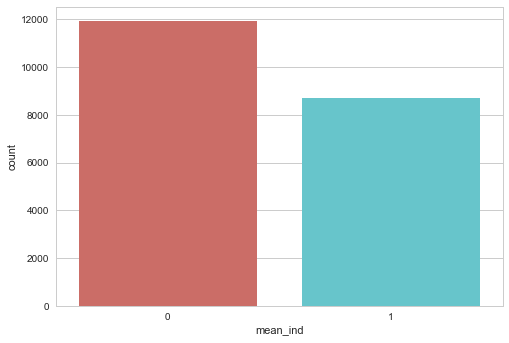

In [14]:
sns.countplot(x='mean_ind', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

##### Next we will do some exploratory analysis on X feature variables

In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [15]:
data.groupby('mean_ind').mean()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
mean_ind,,,,,,,
0,2.993830,27.819546,5.194505,1.118504,1436.318498,3.281528,1.280827
1,5.071911,29.762774,5.750249,1.066770,1410.623952,2.781768,3.147720


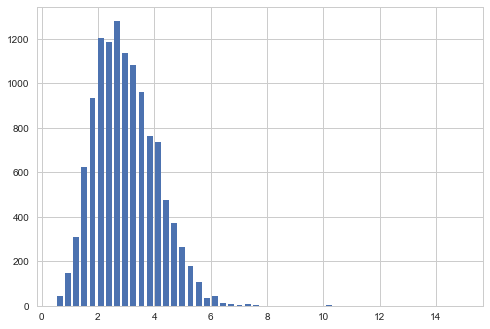

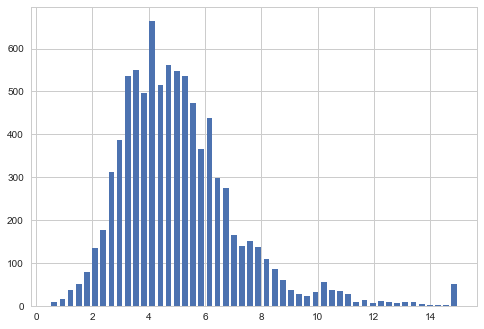

In [21]:
temp1=data.loc[(data['mean_ind']==0),]
temp2=data.loc[(data['mean_ind']==1),]
hist, bins = np.histogram(temp1['MedInc'], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
hist, bins = np.histogram(temp2['MedInc'], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

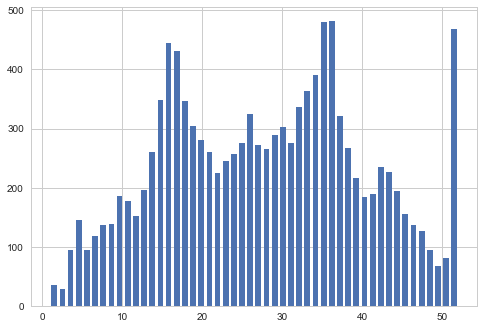

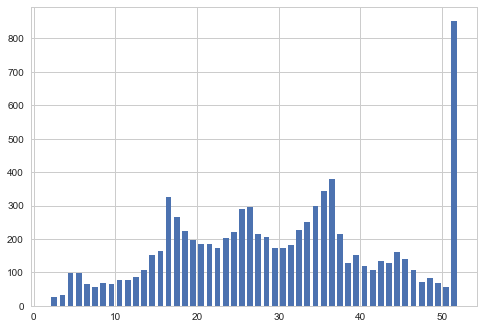

In [23]:
temp1=data.loc[(data['mean_ind']==0),]
temp2=data.loc[(data['mean_ind']==1),]

hist, bins = np.histogram(temp1['HouseAge'], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
hist, bins = np.histogram(temp2['HouseAge'], bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [28]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,mean_ind
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558,0.421948
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956,0.493882
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010,1.000000


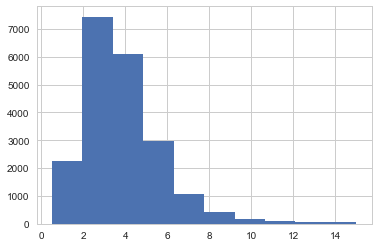

In [35]:
%matplotlib inline
data.MedInc.hist()
plt.show()

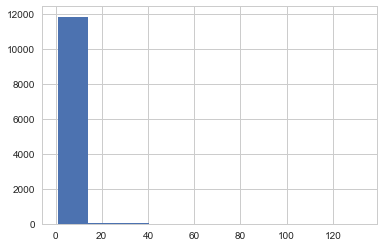

In [42]:
temp1.AveRooms.hist()
plt.show()

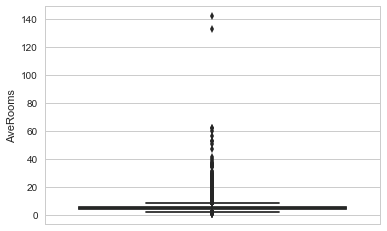

In [46]:
sns.boxplot(data.AveRooms, color="green", orient="v")

##### Clearly some freature variables such as average bedrooms has outliers and we would like to treat them with a reasonable lower bound and upper bound. In this case, we choose 5% for lower bound treatment if needed and 95% for upper bound if needed

In [37]:
data.AveRooms.quantile(0.95)

7.640246547450425

In [41]:
data.AveBedrms.quantile(0.95)

1.273005717594268

In [43]:
data.AveOccup.quantile(0.95)

4.333416666666666

In [44]:
data.Population.quantile(0.95)

3288.0

##### Now let's treat the data by capping AveRooms, AveBedrms, AveOccup, and Population with 95 percentile value

In [47]:
data['AveRooms']=np.where(data['AveRooms'] >=7.7, 7.7, data['AveRooms'])
data['AveBedrms']=np.where(data['AveBedrms'] >=1.3, 1.3, data['AveBedrms'])
data['AveOccup']=np.where(data['AveOccup'] >=4.5, 4.5, data['AveOccup'])
data['Population']=np.where(data['Population'] >=3300, 3300, data['Population'])

In [51]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target,mean_ind
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.278328,1.060338,1345.980378,2.897401,2.068558,0.421948
std,1.899822,12.585558,1.190351,0.090561,787.306350,0.686154,1.153956,0.493882
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250,1.000000
max,15.000100,52.000000,7.700000,1.300000,3300.000000,4.500000,5.000010,1.000000


##### Before we start with modeling, we want to check how individual feature variables compare to each other in terms of predicting power. This housing dataset is small, but we will still demo how recursive feature elimination is applied.

In [57]:
X=data.iloc[:,0:5]
y=data['mean_ind']

##### This is just for demo purpose to show how RFE works. As seen in results, Median income, average rooms and average bedrooms have higher correlations with housing price. But for later execise we will continue with the full dataset.

In [59]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

rfe = RFE(logreg, 3) 
rfe = rfe.fit(X, y) 
print(rfe.support_) 
print(rfe.ranking_)


[ True False  True  True False]
[1 2 1 1 3]


##### Now let's first split the dataset into train and test (we skip validation due to the small size) and see how logistic regression and gradient boosting work on the data. 

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###### Logistic regression 

In [63]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
logitresult=logit_model.fit()
print(logitresult.summary())

Optimization terminated successfully.
         Current function value: 0.466462
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               mean_ind   No. Observations:                13828
Model:                          Logit   Df Residuals:                    13823
Method:                           MLE   Df Model:                            4
Date:                Tue, 21 Nov 2017   Pseudo R-squ.:                  0.3147
Time:                        19:00:09   Log-Likelihood:                -6450.2
converged:                       True   LL-Null:                       -9412.3
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
MedInc         1.4025      0.028     50.852      0.000         1.348     1.457
HouseAge       0.0197      0.

In [70]:
from sklearn.metrics import mean_squared_error
mseTest = mean_squared_error(y_test, logitresult.predict(X_test))
print("MSE_test: %.4f" % mseTest)
mseT = mean_squared_error(y_train, logitresult.predict(X_train))
print("MSE_train: %.4f" % mseT)

MSE_test: 0.1523
MSE_train: 0.1515


###### Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 100, 'max_depth': 6,
        'learning_rate': 0.1, 'loss': 'huber','alpha':0.95}
clf = GradientBoostingRegressor(**params).fit(X_train, y_train)

In [72]:
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE_test: %.4f" % mse)
mseT = mean_squared_error(y_train, clf.predict(X_train))
print("MSE_train: %.4f" % mseT)

MSE_test: 0.1368
MSE_train: 0.0971
